In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
traffic_data = pd.read_csv('traffic_density_202001.csv')

In [3]:
# Display general information about the data
print(traffic_data.shape)

(1676399, 8)


In [4]:
traffic_data.head()

,DATE_TIME,LATITUDE,LONGITUDE,GEOHASH,MAXIMUM_SPEED,MINIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
0,2020-01-01 00:00:00,28.811646,41.080627,sxk3xw,135,18,81,132
1,2020-01-01 00:00:00,29.108276,40.987244,sxk9nm,143,10,73,162
2,2020-01-01 00:00:00,29.097290,41.003723,sxk9q0,128,6,50,110
3,2020-01-01 00:00:00,28.679810,40.998230,sxk3hx,111,22,68,101
4,2020-01-01 00:00:00,28.020630,41.042175,sx7cmx,99,99,99,1


In [5]:
# Display data types of each column
print(traffic_data.dtypes)

DATE_TIME              object
LATITUDE              float64
LONGITUDE             float64
GEOHASH                object
MAXIMUM_SPEED           int64
MINIMUM_SPEED           int64
AVERAGE_SPEED           int64
NUMBER_OF_VEHICLES      int64
dtype: object


In [6]:
#Check for missing values
def check_missing_values(data):
    missing_values = data.isnull().sum()
    
    if any(missing_values):
        print("Columns with missing values:")
        print(missing_values[missing_values > 0])
    else:
        print("No missing values found.")

In [7]:
check_missing_values(traffic_data)

No missing values found.


In [8]:
### EXPLORATORY DATA ANALYSIS

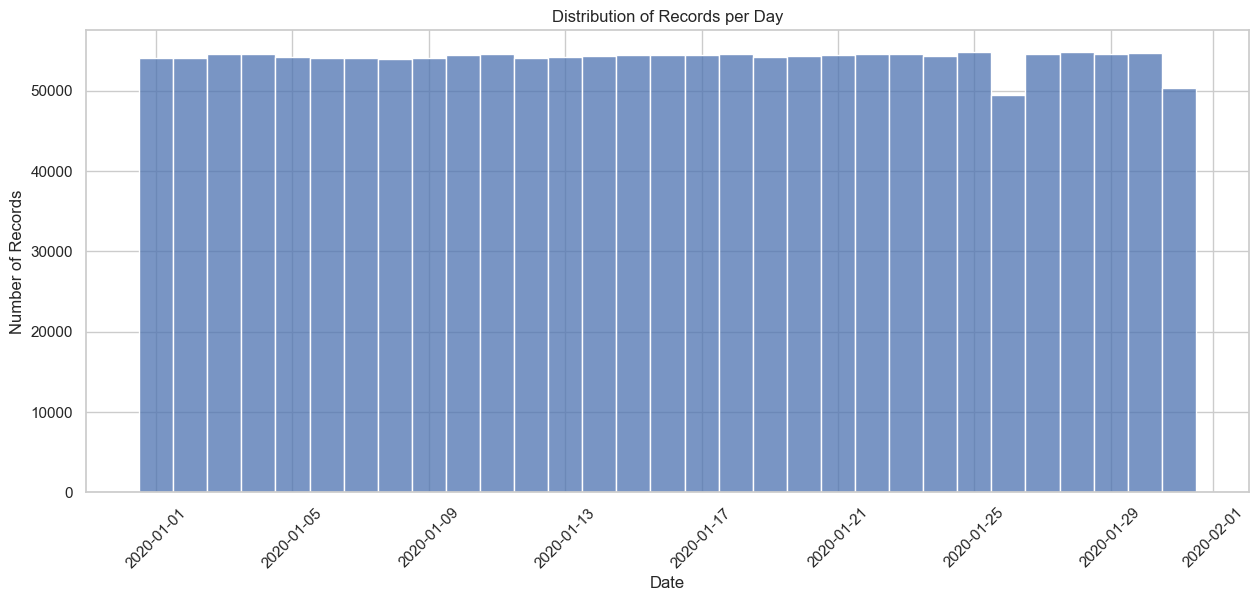

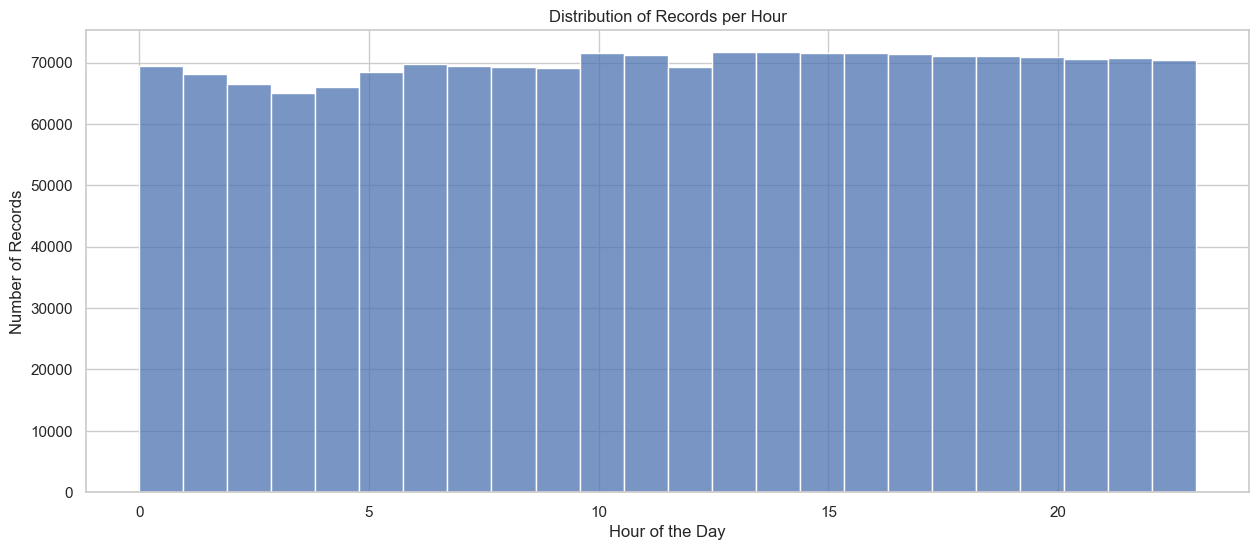


Dataset includes records from 2020-01-01 to 2020-01-31


In [9]:
sns.set(style="whitegrid")

def visualize_datetime_feature(data, datetime_column='DATE_TIME'):
    # Convert 'DATE_TIME' to datetime format
    data[datetime_column] = pd.to_datetime(data[datetime_column])

    # Extract days and hours
    data['Day'] = data[datetime_column].dt.date
    data['Hour'] = data[datetime_column].dt.hour

    # Plotting the distribution of records per day
    plt.figure(figsize=(15, 6))
    sns.histplot(data['Day'], bins=data['Day'].nunique(), kde=False)
    plt.title('Distribution of Records per Day')
    plt.xlabel('Date')
    plt.ylabel('Number of Records')
    plt.xticks(rotation=45)
    plt.show()

    # Plotting the distribution of records per hour
    plt.figure(figsize=(15, 6))
    sns.histplot(data['Hour'], bins=24, kde=False)
    plt.title('Distribution of Records per Hour')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Records')
    plt.show()

    # Display the range of dates in the dataset
    print(f"\nDataset includes records from {data['Day'].min()} to {data['Day'].max()}")

visualize_datetime_feature(traffic_data)

In [10]:
## There are records for each day of the month and each hour of the day. 
## Records of 30 day.
## 24 hour records of each day.

In [11]:
# Extracting additional temporal features
traffic_data['Day'] = traffic_data['DATE_TIME'].dt.date
traffic_data['Hour'] = traffic_data['DATE_TIME'].dt.hour
traffic_data['DayOfWeek'] = traffic_data['DATE_TIME'].dt.dayofweek

In [12]:
# Drop the original 'DATE_TIME' column
traffic_data.drop('DATE_TIME', axis=1, inplace=True)

In [13]:
traffic_data.head()

,LATITUDE,LONGITUDE,GEOHASH,MAXIMUM_SPEED,MINIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,Day,Hour,DayOfWeek
0,28.811646,41.080627,sxk3xw,135,18,81,132,2020-01-01,0,2
1,29.108276,40.987244,sxk9nm,143,10,73,162,2020-01-01,0,2
2,29.097290,41.003723,sxk9q0,128,6,50,110,2020-01-01,0,2
3,28.679810,40.998230,sxk3hx,111,22,68,101,2020-01-01,0,2
4,28.020630,41.042175,sx7cmx,99,99,99,1,2020-01-01,0,2


C:\Users\BatuhanYILMAZ\AppData\Local\Temp\ipykernel_17484\590322033.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='NUMBER_OF_VEHICLES', data=traffic_data, ci=None, estimator='mean', marker='o', label='Average')


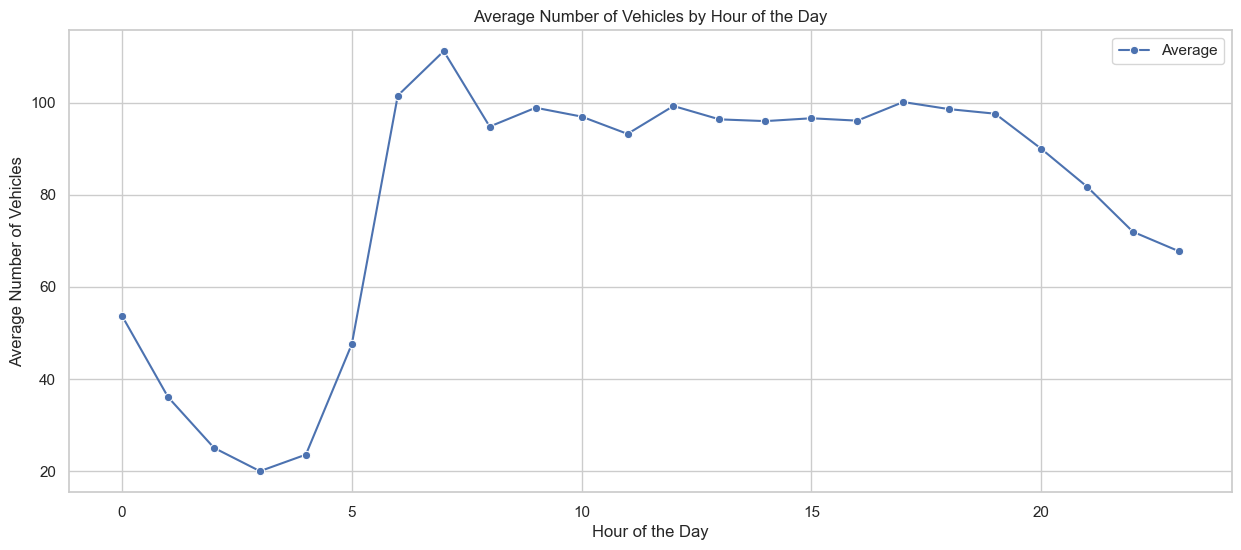

In [14]:
# Visualize the relationship between time and the target variable
plt.figure(figsize=(15, 6))

# Line plot for the average number of vehicles per hour
sns.lineplot(x='Hour', y='NUMBER_OF_VEHICLES', data=traffic_data, ci=None, estimator='mean', marker='o', label='Average')

# Add labels and title
plt.title('Average Number of Vehicles by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Vehicles')

plt.show()

In [15]:
# The hours between 5 - 8.5 ( a.m.) is the time of the day where the traffic is in the most dense stage.
# The hours between the 8 (a.m.) - 4 (p.m) is the time of the day where the traffic is in the most relaxed stage. 

C:\Users\BatuhanYILMAZ\AppData\Local\Temp\ipykernel_17484\1345689437.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='DayOfWeek', y='NUMBER_OF_VEHICLES', data=traffic_data, ci=None, estimator='mean')


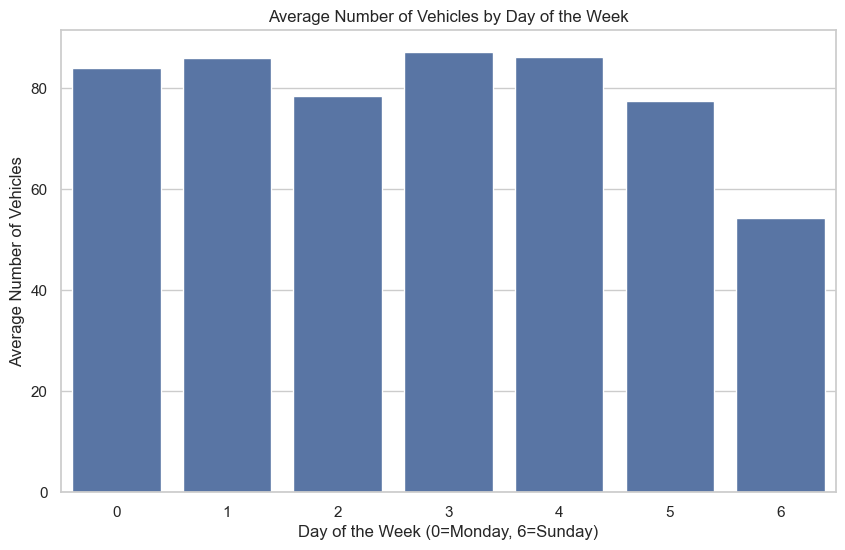

In [16]:
# Visualize the relationship between day of the week and the target variable
plt.figure(figsize=(10, 6))

# Bar plot for the average number of vehicles per day of the week
sns.barplot(x='DayOfWeek', y='NUMBER_OF_VEHICLES', data=traffic_data, ci=None, estimator='mean')

# Add labels and title
plt.title('Average Number of Vehicles by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Number of Vehicles')

plt.show()

In [17]:
# Third ( thursday ) and fourth ( Friday ) day of the week are the days where the traffic is in most dense stage.
# Sixth ( sunday ) day of the week is the day where the traffic is in least relaxed stage.

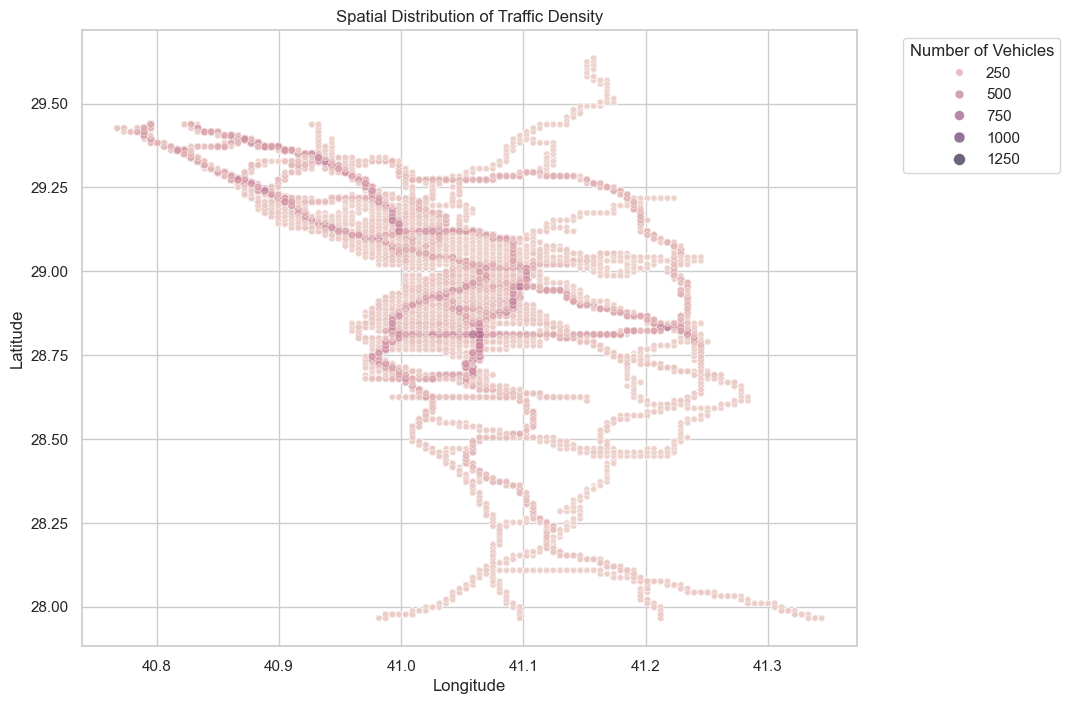

In [18]:
# Visualize the spatial distribution of latitude and longtitude using a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='NUMBER_OF_VEHICLES', size='NUMBER_OF_VEHICLES', data=traffic_data, alpha=0.7)
plt.title('Spatial Distribution of Traffic Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Number of Vehicles', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [19]:
### This visualization shows high-level overview of traffic density across the dataset
# Regions between the latitude 29.25 - 28.75 and longtitude 40.9 - 41.15 have highest traffic density.  
# Regions between the latitude 28 - 28.50 and longtitude 41 - 41.3 have lowest traffic density. 

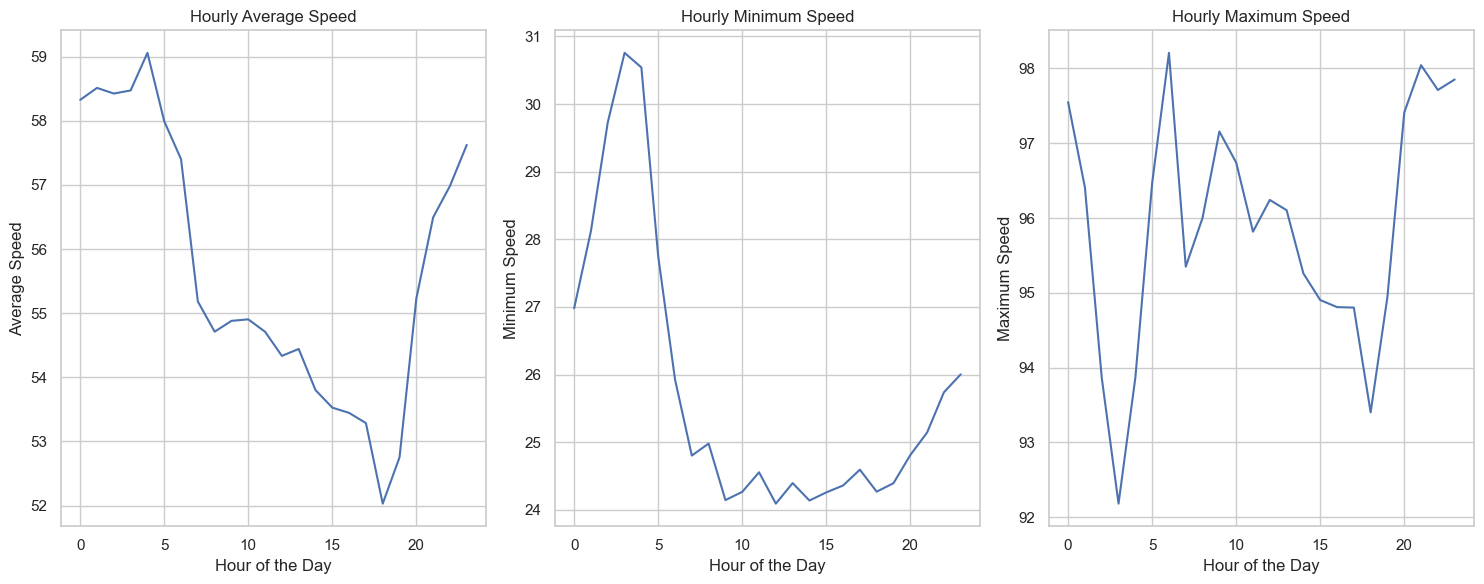

In [20]:
# Calculate average of each speed metric for each hour
hourly_avg_speed = traffic_data.groupby('Hour')['AVERAGE_SPEED'].mean()
hourly_min_speed = traffic_data.groupby('Hour')['MINIMUM_SPEED'].mean()
hourly_max_speed = traffic_data.groupby('Hour')['MAXIMUM_SPEED'].mean()

# Set up the plotting environment
plt.figure(figsize=(15, 6))
sns.set(style="whitegrid")

# Line plot for Average Speed
plt.subplot(1, 3, 1)
sns.lineplot(x=hourly_avg_speed.index, y=hourly_avg_speed.values)
plt.title('Hourly Average Speed')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Speed')

# Line plot for Minimum Speed
plt.subplot(1, 3, 2)
sns.lineplot(x=hourly_min_speed.index, y=hourly_min_speed.values)
plt.title('Hourly Minimum Speed')
plt.xlabel('Hour of the Day')
plt.ylabel('Minimum Speed')

# Line plot for Maximum Speed
plt.subplot(1, 3, 3)
sns.lineplot(x=hourly_max_speed.index, y=hourly_max_speed.values)
plt.title('Hourly Maximum Speed')
plt.xlabel('Hour of the Day')
plt.ylabel('Maximum Speed')

plt.tight_layout()
plt.show()

In [21]:
### The average minimum speed of the cars for the most dense hours of the traffic (5 - 8.5 a.m.) is between 27 - 24 km/h.
### The average minimum speed of the cars for the least dense hours of the traffic ( 8 (p.m) - 4 a.m.) is between 25 - 30.6 km/h.

### The average average speed of the cars for the most dense hours of the traffic (5 - 8.5 a.m.) is between 55 - 58 km/h.
### The average average speed of the cars for the least dense hours of the traffic ( 8 (p.m) - 4 a.m.) is between 55 - 59 km/h.

### The average maximum speed of the cars for the most dense hours of the traffic (5 - 8.5 a.m.) is between 95 - 98 km/h.
### The average maximum speed of the cars for the least dense hours of the traffic ( 8 (p.m) - 4 a.m.) is between 92 - 98 km/h.

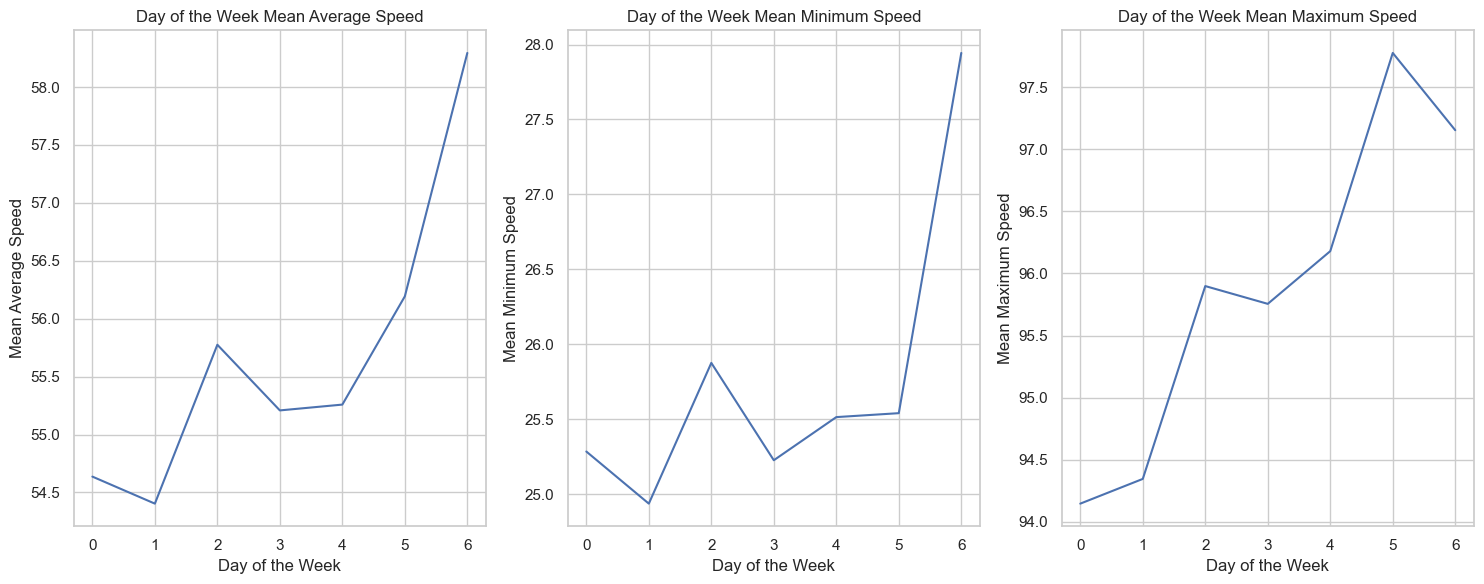

In [22]:
# Calculate mean of each speed metric for each day of the week
day_of_week_avg_speed = traffic_data.groupby('DayOfWeek')['AVERAGE_SPEED'].mean()
day_of_week_min_speed = traffic_data.groupby('DayOfWeek')['MINIMUM_SPEED'].mean()
day_of_week_max_speed = traffic_data.groupby('DayOfWeek')['MAXIMUM_SPEED'].mean()

# Set up the plotting environment
plt.figure(figsize=(15, 6))
sns.set(style="whitegrid")

# Line plot for Mean Average Speed
plt.subplot(1, 3, 1)
sns.lineplot(x=day_of_week_avg_speed.index, y=day_of_week_avg_speed.values)
plt.title('Day of the Week Mean Average Speed')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Average Speed')

# Line plot for Mean Minimum Speed
plt.subplot(1, 3, 2)
sns.lineplot(x=day_of_week_min_speed.index, y=day_of_week_min_speed.values)
plt.title('Day of the Week Mean Minimum Speed')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Minimum Speed')

# Line plot for Mean Maximum Speed
plt.subplot(1, 3, 3)
sns.lineplot(x=day_of_week_max_speed.index, y=day_of_week_max_speed.values)
plt.title('Day of the Week Mean Maximum Speed')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Maximum Speed')

plt.tight_layout()
plt.show()

In [23]:
### The mean average speed of the cars for the most dense day of the traffic (day 3 ->Thursday) is 55.2 km/h.
### The mean average speed of the cars for the least dense day of the traffic (day 6 ->Sunday) is 58.5 km/h.

### The mean minimum speed of the cars for the most dense day of the traffic (day 3 ->Thursday) is 25.3 km/h.
### The mean minimum speed of the cars for the least dense day of the traffic (day 6 ->Sunday) is 27.8 km/h.

### The mean maximum speed of the cars for the most dense day of the traffic (day 3 ->Thursday) is 95.7 km/h.
### The mean maximum speed of the cars for the least dense day of the traffic (day 6 ->Sunday) is 97.2 km/h.

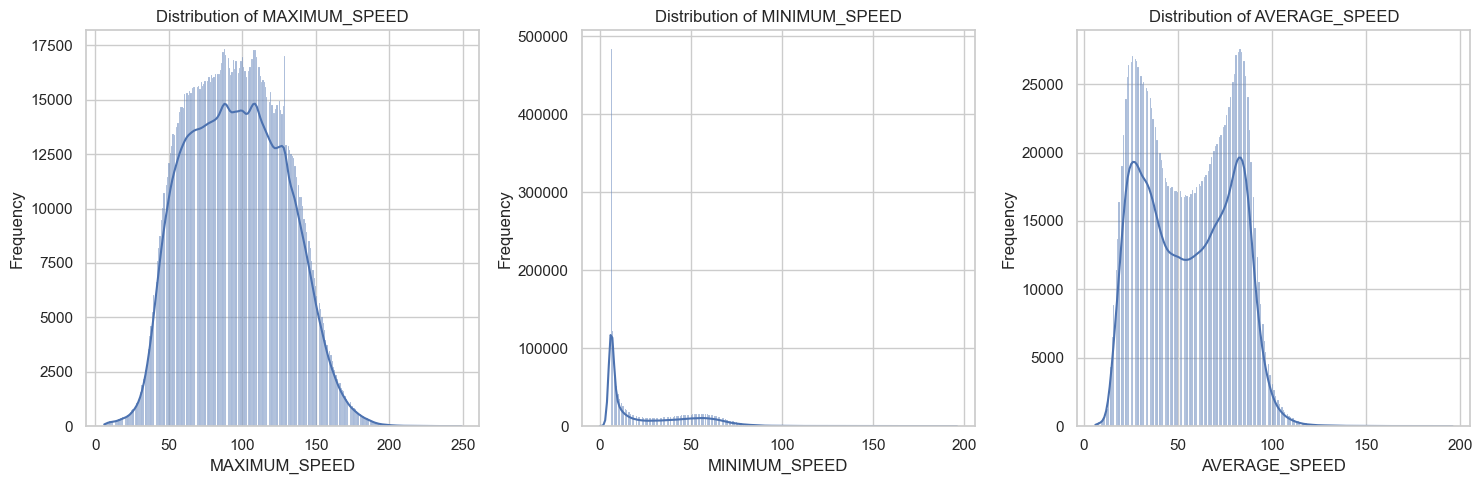

In [24]:
plt.figure(figsize=(15, 5))
sns.set(style="whitegrid")

# List of speed-related features
speed_features = ['MAXIMUM_SPEED', 'MINIMUM_SPEED', 'AVERAGE_SPEED']

# Visualize individual speed-related features
for i, feature in enumerate(speed_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(traffic_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

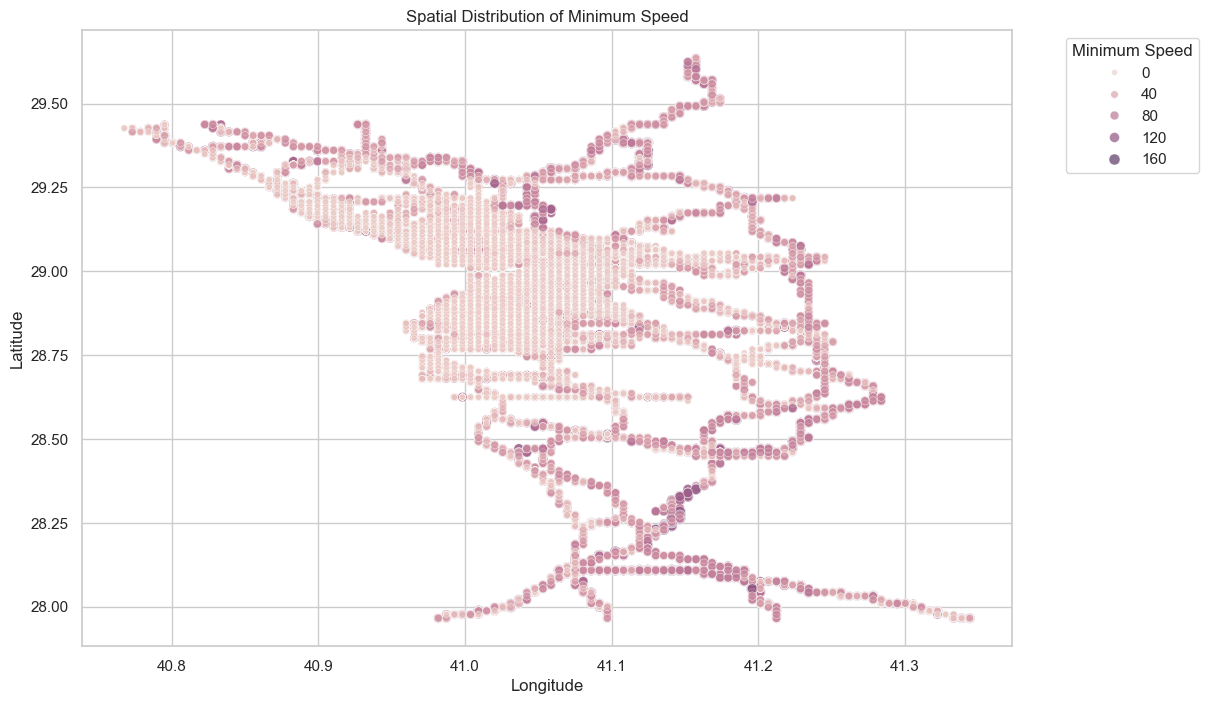

In [25]:
# Relations between the minimum speed and geographic locations. 
plt.figure(figsize=(12, 8))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='MINIMUM_SPEED', size='MINIMUM_SPEED', data=traffic_data, alpha=0.7)
plt.title('Spatial Distribution of Minimum Speed')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Minimum Speed', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [26]:
### For the regions that have the highest traffic density, minimum speed is between 0 - 40 km/h.
### For the regions that have the lowest traffic density, minimum speed is between 80 - 120 km/h.

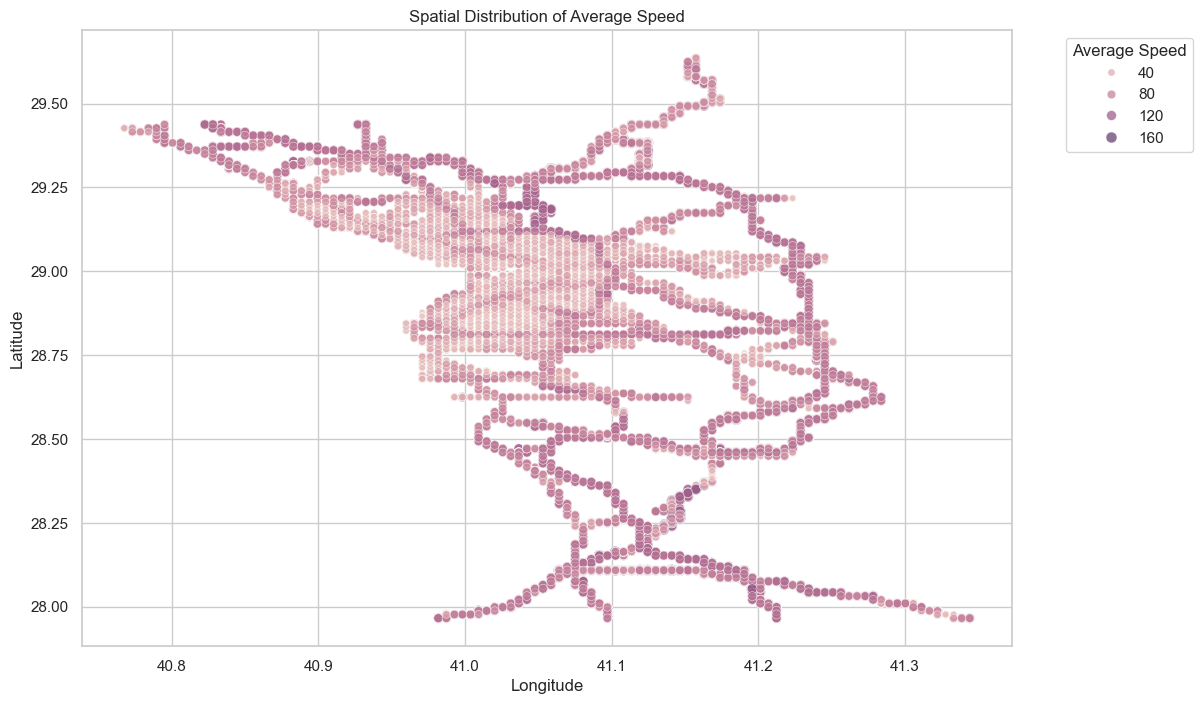

In [27]:
# Relations between the average speed and geographic locations. 
plt.figure(figsize=(12, 8))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='AVERAGE_SPEED', size='AVERAGE_SPEED', data=traffic_data, alpha=0.7)
plt.title('Spatial Distribution of Average Speed')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Average Speed', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [28]:
### For the regions that have the highest traffic density, average speed is between 40 - 80 km/h.
### For the regions that have the lowest traffic density, average speed is between 120 - 160 km/h.

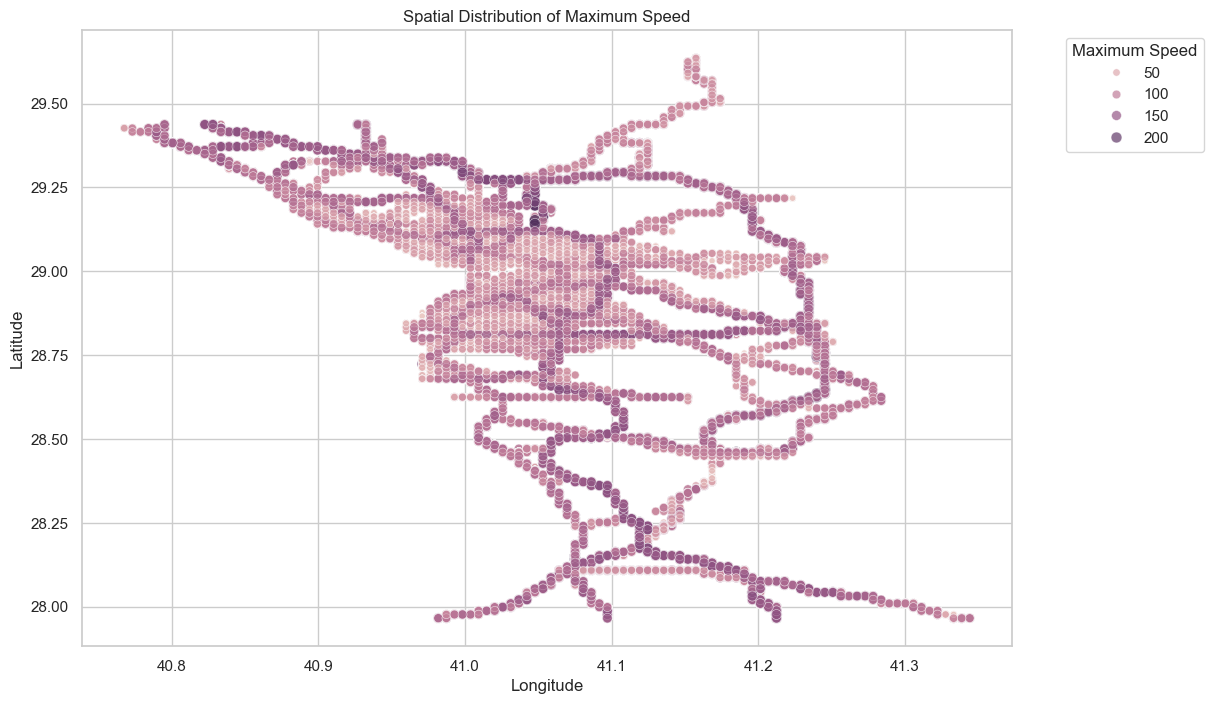

In [29]:
# Relations between the maximum speed and geographic locations. 
plt.figure(figsize=(12, 8))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='MAXIMUM_SPEED', size='MAXIMUM_SPEED', data=traffic_data, alpha=0.7)
plt.title('Spatial Distribution of Maximum Speed')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Maximum Speed', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [30]:
### For the regions that have the highest traffic density, maximum speed is between 50 - 100 km/h.
### For the regions that have the lowest traffic density, maximum speed is between 150 - 200 km/h.

In [31]:
traffic_data.head()

,LATITUDE,LONGITUDE,GEOHASH,MAXIMUM_SPEED,MINIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,Day,Hour,DayOfWeek
0,28.811646,41.080627,sxk3xw,135,18,81,132,2020-01-01,0,2
1,29.108276,40.987244,sxk9nm,143,10,73,162,2020-01-01,0,2
2,29.097290,41.003723,sxk9q0,128,6,50,110,2020-01-01,0,2
3,28.679810,40.998230,sxk3hx,111,22,68,101,2020-01-01,0,2
4,28.020630,41.042175,sx7cmx,99,99,99,1,2020-01-01,0,2


In [32]:
from scipy.stats import ttest_ind, mannwhitneyu

# Null Hypothesis (H0): There is no significant difference in average traffic density between weekdays and weekends.
# Alternative Hypothesis (H1): Average traffic density is significantly different between weekdays and weekends.

# Separate data for weekdays and weekends
weekday_traffic = traffic_data[traffic_data['DayOfWeek'] < 5]['NUMBER_OF_VEHICLES']
weekend_traffic = traffic_data[traffic_data['DayOfWeek'] >= 5]['NUMBER_OF_VEHICLES']

# Perform t-test
t_stat, p_value_t = ttest_ind(weekday_traffic, weekend_traffic)
# Perform Mann-Whitney U test as a non-parametric alternative
u_stat, p_value_u = mannwhitneyu(weekday_traffic, weekend_traffic)

# Print results
print(f'T-test: t-statistic = {t_stat}, p-value = {p_value_t}')
print(f'Mann-Whitney U test: U-statistic = {u_stat}, p-value = {p_value_u}')

if p_value_t < 0.05 or p_value_u < 0.05:
    print('Reject H0: Average traffic density is significantly different between weekdays and weekends.')
else:
    print('Fail to reject H0: There is no significant difference in average traffic density between weekdays and weekends.')

T-test: t-statistic = 98.77021150680862, p-value = 0.0
Mann-Whitney U test: U-statistic = 290017648451.5, p-value = 0.0
Reject H0: Average traffic density is significantly different between weekdays and weekends.


In [33]:
from scipy.stats import f_oneway

# Null Hypothesis (H0): There is no significant difference in average speed between different hours of the day.
# Alternative Hypothesis (H1): Average speed varies significantly across different hours of the day.

# Perform ANOVA
f_stat, p_value_anova = f_oneway(traffic_data['AVERAGE_SPEED'][traffic_data['Hour'] == 0],
                                 traffic_data['AVERAGE_SPEED'][traffic_data['Hour'] == 1],
                                 traffic_data['AVERAGE_SPEED'][traffic_data['Hour'] == 2],
                                 # ... repeat for all hours ...
                                 traffic_data['AVERAGE_SPEED'][traffic_data['Hour'] == 23])

# Print results
print(f'ANOVA: F-statistic = {f_stat}, p-value = {p_value_anova}')

if p_value_anova < 0.05:
    print('Reject H0: Average speed varies significantly across different hours of the day.')
else:
    print('Fail to reject H0: There is no significant difference in average speed between different hours of the day.')

ANOVA: F-statistic = 24.257866466376218, p-value = 1.0920126922603802e-15
Reject H0: Average speed varies significantly across different hours of the day.


In [34]:
from scipy.stats import pearsonr

# Null Hypothesis (H0): There is no correlation between maximum speed and the number of vehicles.
# Alternative Hypothesis (H1): There is a significant correlation between maximum speed and the number of vehicles.

# Perform Pearson correlation
corr_coeff_max_speed, p_value_max_speed = pearsonr(traffic_data['MAXIMUM_SPEED'], traffic_data['NUMBER_OF_VEHICLES'])

# Print results
print(f'Pearson correlation (Maximum Speed vs. Number of Vehicles): r = {corr_coeff_max_speed}, p-value = {p_value_max_speed}')

if p_value_max_speed < 0.05:
    print('Reject H0: There is a significant correlation between maximum speed and the number of vehicles.')
else:
    print('Fail to reject H0: There is no correlation between maximum speed and the number of vehicles.')

Pearson correlation (Maximum Speed vs. Number of Vehicles): r = 0.27859713308481604, p-value = 0.0
Reject H0: There is a significant correlation between maximum speed and the number of vehicles.


In [35]:
# Null Hypothesis (H0): There is no correlation between minimum speed and the number of vehicles.
# Alternative Hypothesis (H1): There is a significant correlation between minimum speed and the number of vehicles.

# Perform Pearson correlation
corr_coeff_min_speed, p_value_min_speed = pearsonr(traffic_data['MINIMUM_SPEED'], traffic_data['NUMBER_OF_VEHICLES'])

# Print results
print(f'Pearson correlation (Minimum Speed vs. Number of Vehicles): r = {corr_coeff_min_speed}, p-value = {p_value_min_speed}')

if p_value_min_speed < 0.05:
    print('Reject H0: There is a significant correlation between minimum speed and the number of vehicles.')
else:
    print('Fail to reject H0: There is no correlation between minimum speed and the number of vehicles.')

Pearson correlation (Minimum Speed vs. Number of Vehicles): r = -0.3121361543642831, p-value = 0.0
Reject H0: There is a significant correlation between minimum speed and the number of vehicles.


In [36]:
# Null Hypothesis (H0): There is no correlation between average speed and the number of vehicles.
# Alternative Hypothesis (H1): There is a significant correlation between average speed and the number of vehicles.

# Perform Pearson correlation
corr_coeff_avg_speed, p_value_avg_speed = pearsonr(traffic_data['AVERAGE_SPEED'], traffic_data['NUMBER_OF_VEHICLES'])

# Print results
print(f'Pearson correlation (Average Speed vs. Number of Vehicles): r = {corr_coeff_avg_speed}, p-value = {p_value_avg_speed}')

if p_value_avg_speed < 0.05:
    print('Reject H0: There is a significant correlation between average speed and the number of vehicles.')
else:
    print('Fail to reject H0: There is no correlation between average speed and the number of vehicles.')

Pearson correlation (Average Speed vs. Number of Vehicles): r = -0.07150968469032755, p-value = 0.0
Reject H0: There is a significant correlation between average speed and the number of vehicles.


In [37]:
# Drop the GEOHASH column as it is hard to preprocess it. (Also, we already have the correct latitude and longtitude features).
traffic_data = traffic_data.drop(['GEOHASH'], axis=1)

In [38]:
traffic_data.head()

,LATITUDE,LONGITUDE,MAXIMUM_SPEED,MINIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,Day,Hour,DayOfWeek
0,28.811646,41.080627,135,18,81,132,2020-01-01,0,2
1,29.108276,40.987244,143,10,73,162,2020-01-01,0,2
2,29.097290,41.003723,128,6,50,110,2020-01-01,0,2
3,28.679810,40.998230,111,22,68,101,2020-01-01,0,2
4,28.020630,41.042175,99,99,99,1,2020-01-01,0,2


In [39]:
traffic_data.dtypes

LATITUDE              float64
LONGITUDE             float64
MAXIMUM_SPEED           int64
MINIMUM_SPEED           int64
AVERAGE_SPEED           int64
NUMBER_OF_VEHICLES      int64
Day                    object
Hour                    int32
DayOfWeek               int32
dtype: object

In [40]:
### A Scaling-method (min-max , z-score..etc) could be applied here. For the moment, we will continue without scaling the data.

In [41]:
""" OPTIONAL
SINCE EACH LATITUDE AND LONGTITUDE IS CRUCIAL FOR TRAFFIC ESTIMATION, THEY ARE LEFT AS THEY ARE. HOWEVER, FOLLOWING CODE
CAN BE USED FOR APPLYING WINSORIZATION TO THE OUTLIERS IN ORDER TO COMPARE WITH THE ALTERNATIVE MODEL PERFORMANCE.

from scipy.stats.mstats import winsorize

# Define the lower and upper percentiles for winsorization
lower_limit = 0.02
upper_limit = 0.98
columns_to_winsorize = ['MAXIMUM_SPEED', 'MINIMUM_SPEED', 'AVERAGE_SPEED']

# Apply winsorization
for column in columns_to_winsorize:
    traffic_data[column] = winsorize(traffic_data[column], limits=(lower_limit, upper_limit))
"""

" OPTIONAL\nSINCE EACH LATITUDE AND LONGTITUDE IS CRUCIAL FOR TRAFFIC ESTIMATION, THEY ARE LEFT AS IT IS. HOWEVER, FOLLOWING CODE\nCAN BE USED FOR APPLYING WINSORIZATION TO COMPARE WITH THE ALTERNATIVE MODEL PERFORMANCE.\n\nfrom scipy.stats.mstats import winsorize\n\n# Define the lower and upper percentiles for winsorization\nlower_limit = 0.02\nupper_limit = 0.98\ncolumns_to_winsorize = ['MAXIMUM_SPEED', 'MINIMUM_SPEED', 'AVERAGE_SPEED']\n\n# Apply winsorization\nfor column in columns_to_winsorize:\n    traffic_data[column] = winsorize(traffic_data[column], limits=(lower_limit, upper_limit))\n"

In [42]:
traffic_data.head()

,LATITUDE,LONGITUDE,MAXIMUM_SPEED,MINIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,Day,Hour,DayOfWeek
0,28.811646,41.080627,135,18,81,132,2020-01-01,0,2
1,29.108276,40.987244,143,10,73,162,2020-01-01,0,2
2,29.097290,41.003723,128,6,50,110,2020-01-01,0,2
3,28.679810,40.998230,111,22,68,101,2020-01-01,0,2
4,28.020630,41.042175,99,99,99,1,2020-01-01,0,2


In [43]:
def convert_day_to_numeric(data):
    data['Day'] = pd.to_datetime(data['Day'])
    data['day_of_month'] = data['Day'].dt.day
    data.drop(columns=['Day'], inplace=True)  # Optionally, you can drop the original 'day' column
    return data

traffic_data = convert_day_to_numeric(traffic_data)
traffic_data.head()

,LATITUDE,LONGITUDE,MAXIMUM_SPEED,MINIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,Hour,DayOfWeek,day_of_month
0,28.811646,41.080627,135,18,81,132,0,2,1
1,29.108276,40.987244,143,10,73,162,0,2,1
2,29.097290,41.003723,128,6,50,110,0,2,1
3,28.679810,40.998230,111,22,68,101,0,2,1
4,28.020630,41.042175,99,99,99,1,0,2,1


In [44]:
def lowerize_column_names(data):
    data.columns = [col.lower() for col in data.columns]
    return data

lowerize_column_names(traffic_data)

,latitude,longitude,maximum_speed,minimum_speed,average_speed,number_of_vehicles,hour,dayofweek,day_of_month
0,28.811646,41.080627,135,18,81,132,0,2,1
1,29.108276,40.987244,143,10,73,162,0,2,1
2,29.097290,41.003723,128,6,50,110,0,2,1
3,28.679810,40.998230,111,22,68,101,0,2,1
4,28.020630,41.042175,99,99,99,1,0,2,1
...,...,...,...,...,...,...,...,...,...
1676394,28.910522,40.998230,45,6,21,27,23,4,31
1676395,28.800659,41.025696,38,7,19,35,23,4,31
1676396,29.371948,40.932312,110,51,81,26,23,4,31
1676397,28.075562,41.075134,136,45,88,22,23,4,31


In [46]:
# Reorder the columns
new_order = ['day_of_month', 'hour', 'dayofweek', 'latitude','longitude', 'maximum_speed', 'minimum_speed', 'average_speed', 'number_of_vehicles']
traffic_data = traffic_data[new_order]
traffic_data.head()

,day_of_month,hour,dayofweek,latitude,longitude,maximum_speed,minimum_speed,average_speed,number_of_vehicles
0,1,0,2,28.811646,41.080627,135,18,81,132
1,1,0,2,29.108276,40.987244,143,10,73,162
2,1,0,2,29.097290,41.003723,128,6,50,110
3,1,0,2,28.679810,40.998230,111,22,68,101
4,1,0,2,28.020630,41.042175,99,99,99,1


In [47]:
# Save the updated dataset
traffic_data.to_csv('preprocessed_traffic_data.csv', index=False)